<a href="https://colab.research.google.com/github/Haxr213/Universidade_Catolica_Santos/blob/master/6_Semestre/Inteligencia_Artificial/DecisionTreeMushrooms1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Trabalho de IA - Árvores de decisão



###  Disciplina: Inteligência Artificial I
###  Professor: Marcio Luiz Piva
###  Membros:
###  Guilherme Rabelo
###  Luis Durante
###  Victor Gabriel
###  Victor Moreno
###  Vitor Oliveira
###  Universidade Católica de Santos - 13/05/2020

In [ ]:
#  Trabalho Prático de Árvores de Decisão
#
#  Disciplina: Inteligência Artificial I
#  Professor: Marcio Luiz Piva
#  Membros:
#  Guilherme Rabelo
#  Luis Durante
#  Victor Gabriel
#  Victor Moreno
#  Vitor Oliveira
#  Universidade Católica de Santos - 13/05/2020

In [ ]:
import pandas as pd
import graphviz

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report

url = 'https://raw.githubusercontent.com/luisdurante/test/master/mushrooms.csv'

## Carrega o dataset

In [ ]:
df = pd.read_csv(url)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


### Checa o número de ocorrências de categoria por coluna

In [ ]:
df.apply(pd.Series.value_counts).fillna(0)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a,0.0,0.0,0.0,0.0,0.0,400.0,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,384.0,0.0
b,0.0,452.0,0.0,168.0,0.0,0.0,0.0,0.0,5612.0,1728.0,0.0,3776.0,0.0,0.0,432.0,432.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0
c,0.0,4.0,0.0,44.0,0.0,192.0,0.0,6812.0,0.0,0.0,0.0,556.0,0.0,0.0,36.0,36.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0
d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3148.0
e,4208.0,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,96.0,3516.0,1120.0,0.0,0.0,96.0,96.0,0.0,0.0,0.0,2776.0,0.0,0.0,0.0
f,0.0,3152.0,2320.0,0.0,4748.0,2160.0,7914.0,0.0,0.0,0.0,0.0,0.0,552.0,600.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0
g,0.0,0.0,4.0,1840.0,0.0,0.0,0.0,0.0,0.0,752.0,0.0,0.0,0.0,0.0,576.0,576.0,0.0,0.0,0.0,0.0,0.0,0.0,2148.0
h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,732.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1632.0,0.0,0.0
k,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408.0,0.0,0.0,2372.0,2304.0,0.0,0.0,0.0,0.0,0.0,0.0,1872.0,0.0,0.0


## Separa features e targets

e = comestível

p = venenoso

O modelo prevê $ p(venenoso) $, note que $ p(comestivel) = 1 - p(venenoso) $ 

In [ ]:
TARGET = 'venenoso'
df['venenoso'] = df['class'].replace({'p': 1, 'e':  0})
df = df.drop(columns=['class'])
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,venenoso
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,0


In [ ]:
y = df['venenoso']
y = pd.get_dummies(y)

X = df.drop(columns=['venenoso'])
X = pd.get_dummies(X)

X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


## Separa treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size=1/3)

tr = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth = 3, min_samples_leaf = 5)
tr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###Calcula acurácia do modelo no dataset de treino

In [ ]:
tr.score(X_train, y_train)

0.9625184638109305

### Calcula acurácia do modelo no dataset de teste

In [ ]:
tr.score(X_test, y_test)

0.9597488921713442

### Calcula outras métricas de validação

In [ ]:
y_hat = tr.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1401
           1       0.92      1.00      0.96      1307

   micro avg       0.96      0.96      0.96      2708
   macro avg       0.96      0.96      0.96      2708
weighted avg       0.96      0.96      0.96      2708
 samples avg       0.96      0.96      0.96      2708



## Visualização dos splits da árvore

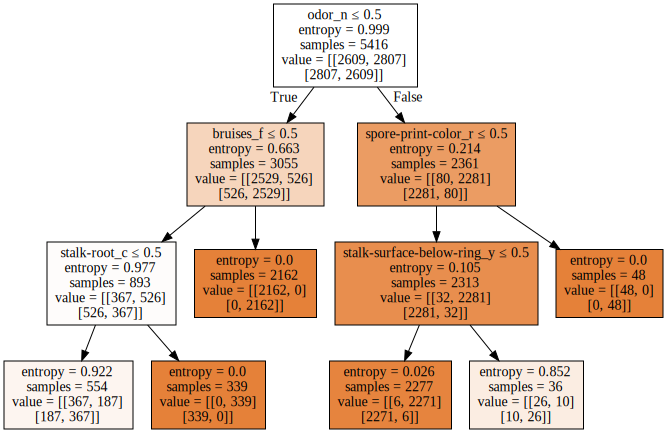

In [ ]:
data_visualization = export_graphviz(tr, out_file=None,
                                feature_names=X_test.columns,
                               filled=True, special_characters=True)
graph = graphviz.Source(data_visualization)
graph